In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

Insertion Sort Runtime: 20000.0 seconds
Merge Sort Runtime: 1163.0 seconds

Merge sort becomes more efficient after 471146 inputs.


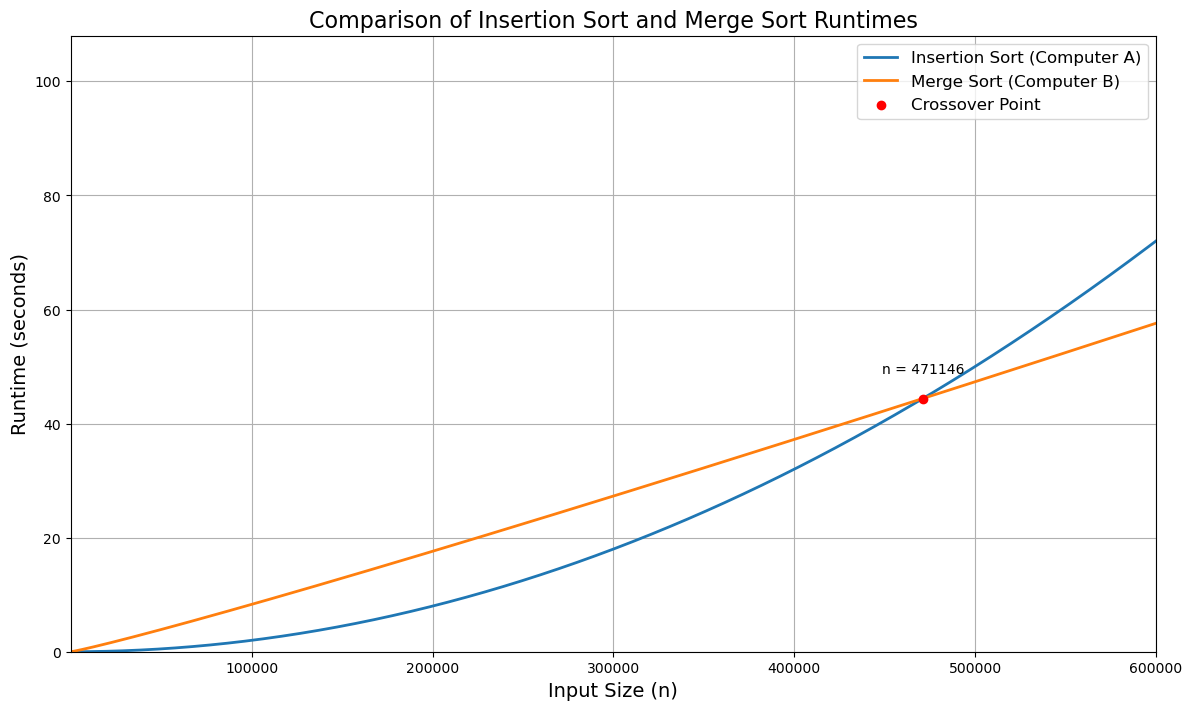

In [47]:
# compare insertions and merge sort for a given input of n
# determine the crossover point where merge sort becomes more efficient

# define the parameters of thep problem
constant_one = 2
constant_two = 50
computation_input_size = 10**7
compute_instructions_per_second_A = 10**10
compute_instructions_per_second_B = 10**7

# Define the runtime for insertion sort
def runtime_insertion_sort(c, n, inst):
    if c > 0 and n > 0 and inst > 0:
        return c * n**2 / inst

# Define the runtimes for merge sort
def runtime_merge_sort(c,n,inst):
    if c > 0 and n > 0 and inst > 0:
        return c * n * np.log2(n) / inst

# compare runtimes
runtime_insertion = runtime_insertion_sort(constant_one, computation_input_size, compute_instructions_per_second_A)
runtime_insertion = round(runtime_insertion,0)

runtime_merge = runtime_merge_sort(constant_two, computation_input_size, compute_instructions_per_second_B)
runtime_merge = round(runtime_merge, 0)

# print the results
print(f"Insertion Sort Runtime: {runtime_insertion} seconds")
print(f"Merge Sort Runtime: {runtime_merge} seconds\n")


# Determine the crossoverpoint (buy guessing)
# expand the size of the range as needed
def find_crossover_point():
    for n in range(2, 1000000):
        insertion_sort_time = runtime_insertion_sort(constant_one, n, compute_instructions_per_second_A)
        merge_sort_time = runtime_merge = runtime_merge_sort(constant_two, n, compute_instructions_per_second_B)
        if merge_sort_time < insertion_sort_time:
            return n
    return None

# Crossover Point
crossover_point = find_crossover_point()
if crossover_point:
    print(f'Merge sort becomes more efficient after {crossover_point} inputs.')

    # Compute runtimes at the crossover point
    crossover_insertion_sort = runtime_insertion_sort(constant_one, crossover_point, compute_instructions_per_second_A)
    crossover_merge_sort = runtime_merge_sort(constant_two, crossover_point, compute_instructions_per_second_B)

    # Generate values of n for the graph
    n_values = np.linspace(1, 600000, 1000)  # From 1 to x with 1000 points for smoother graph
    
    # Compute runtimes for both algorithms
    insertion_sort_runtimes = [runtime_insertion_sort(constant_one, n, compute_instructions_per_second_A) for n in n_values]
    merge_sort_runtimes = [runtime_merge_sort(constant_two, n, compute_instructions_per_second_B) for n in n_values]
    
    # Plot the graph
    plt.figure(figsize=(14, 8))
    plt.plot(n_values, insertion_sort_runtimes, label="Insertion Sort (Computer A)", linewidth=2)
    plt.plot(n_values, merge_sort_runtimes, label="Merge Sort (Computer B)", linewidth=2)

    # Highlight the crossover point
    plt.scatter([crossover_point], [crossover_insertion_sort], color="red", label="Crossover Point", zorder=5)

    # Annotate the crossover point
    plt.text(crossover_point, crossover_insertion_sort * 1.1, f"n = {crossover_point}", fontsize=10, ha="center")

    # Add labels, title, and legend
    plt.title("Comparison of Insertion Sort and Merge Sort Runtimes", fontsize=16)
    plt.xlabel("Input Size (n)", fontsize=14)
    plt.ylabel("Runtime (seconds)", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Scale appropriately to highlight the crossover
    plt.xlim(1, 600000) # increase to extend the x-axis
    plt.ylim(0, max(max(insertion_sort_runtimes), max(merge_sort_runtimes)) * 1.5) # extend y-axis scaling

    # Show the plot
    plt.show()
else:
    print("Merge sort does not become more efficient within the tested range.")
